In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('bike_sharing_data.txt')
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
df.isnull().sum()

Population    0
Profit        0
dtype: int64

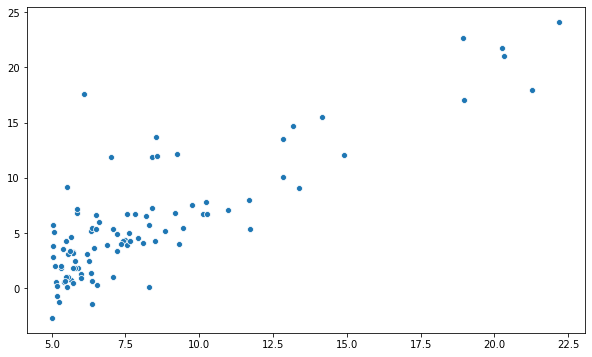

In [41]:
plt.figure(figsize = (10, 6))
X = df['Population'].values
Y = df['Profit'].values
sns.scatterplot(X, Y)
plt.show()

# Performing Linear Regression 

### Calculating Coefficients (b0 & b1)


In [31]:
x_mean = np.mean(X)
y_mean = np.mean(Y)
m = len(X)

numerator = 0
denominator = 0

for i in range(m):
    numerator = numerator + ((X[i] - x_mean) * (Y[i] - y_mean))
    denominator = denominator + (X[i] - x_mean) ** 2
    
# b1 => m (Slope)  & b0 => c (Intercept)
b1 = numerator / denominator

# y = mx + c  : c = y - mx
b0 = (y_mean - b1 * x_mean)

print("Slope: {}, Intercept: {}".format(b1, b0))

Slope: 1.193033644189594, Intercept: -3.8957808783118537


## Plotting Values On Regression Line 

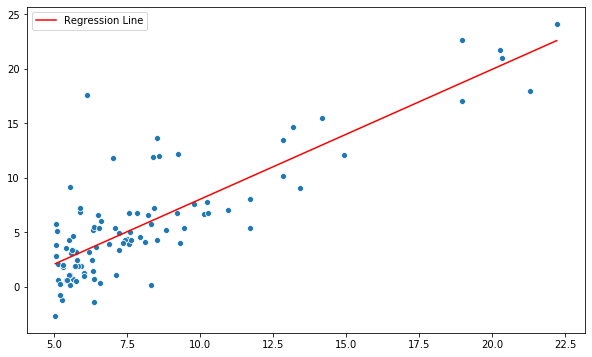

In [44]:
plt.figure(figsize = (10, 6))
max_x = np.max(X)
min_x = np.min(X)

x = np.linspace(min_x, max_x, 10)
y = b1 * x + b0

plt.plot(x, y, color = 'red', label='Regression Line')
sns.scatterplot(X, Y)
plt.show()

## Calculating RMSE (Root Mean Square Error)

In [49]:
rmse = 0
for i in range(m):
    y_pred = b1 * X[i] + b0
    rmse = rmse + (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

2.9923139460876023


## Calculating R2 Score

In [50]:
ss_tot = 0
ss_res = 0
for i in range(m):
    y_pred = b1 * X[i] + b0
    ss_tot = ss_tot + (Y[i] - y_mean) ** 2
    ss_res = ss_res + (Y[i] - y_pred) ** 2
r2_score = 1 - (ss_res / ss_tot)
print(r2_score)

0.7020315537841397


## Calculating RMSE & R2 Score Using Sklearn

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape(m, 1)
reg = LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
y_pred = b1 * X + b0
mse = mean_squared_error(Y, y_pred)
mse = np.sqrt(mse)
print(mse)

2.9923139460876023


In [61]:
r2_score = reg.score(X, Y)
print(r2_score)

0.7020315537841397
